In [5]:

%pylab inline
%load_ext rpy2.ipython
%config InlineBackend.figure_format='retina'

Populating the interactive namespace from numpy and matplotlib


In [6]:
from SuchTree import SuchTree, SuchLinkedTrees
import pandas
import seaborn
import matplotlib

In [7]:
from rpy2 import robjects

# tell R to be quiet
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings( 'ignore', category=RRuntimeWarning )
robjects.r( 'options( warn = -1 )' )
robjects.r( 'sink( "/dev/null" )' )

# load libraries into the R global context
robjects.r( 'library("phytools")' )
robjects.r( 'library("igraph")' )

def plot_cophylo( host, guest, links, X, Y, output ) :
    
    # plot cophylogeny using R
    r_code = '''
    tr1 <- read.tree( "HOST_TREE" )
    tr2 <- read.tree( "GUEST_TREE" )
    links <- read.csv( "LINKS", row.names=1, stringsAsFactors = F )
    im <- graph_from_incidence_matrix( as.matrix( links ) )
    assoc <- as_edgelist( im )
    obj <- cophylo( tr1, tr2, assoc=assoc )
    pdf( "OUTFILE", width = XX, height = YY )
    plot( obj )
    dev.off()
    '''
    r_code = r_code.replace( 'HOST_TREE', host )
    r_code = r_code.replace( 'GUEST_TREE', guest )
    r_code = r_code.replace( 'LINKS', links )
    r_code = r_code.replace( 'OUTFILE', output )
    r_code = r_code.replace( 'XX', str(X) )
    r_code = r_code.replace( 'YY', str(Y) )
    
    robjects.r( r_code )

In [8]:
import igraph

gl_host  = SuchTree( '../../SuchTree/data/gopher-louse/gopher.tree' )
gl_guest = SuchTree( '../../SuchTree/data/gopher-louse/lice.tree' )
gl_links = pandas.read_csv( '../../SuchTree/data/gopher-louse/links.csv', index_col=0 )

plot_cophylo( '../../SuchTree/data/gopher-louse/gopher.tree',
              '../../SuchTree/data/gopher-louse/lice.tree',
              '../../SuchTree/data/gopher-louse/links.csv',
              5, 5, 'figures/gopher_louse_cophylo.pdf' )

gl_SLT = SuchLinkedTrees( gl_host, gl_guest, gl_links )
#gl_g = gl_SLT.to_igraph()
#visual_style = { 'vertex_size' : 24, 
#                 'layout'      : gl_g.layout_reingold_tilford() }
#igraph.plot( gl_g, 'figures/gopher_louse_graph.pdf', bbox=(500,500), **visual_style )

sm_host  = SuchTree( '../../SuchTree/data/sedge-smut/host.tree' )
sm_guest = SuchTree( '../../SuchTree/data/sedge-smut/guest.tree' )
sm_links = pandas.read_csv( '../../SuchTree/data/sedge-smut/links.csv', index_col=0 )

plot_cophylo( '../../SuchTree/data/sedge-smut/host.tree',
              '../../SuchTree/data/sedge-smut/guest.tree',
              '../../SuchTree/data/sedge-smut/links.csv',
              8, 8, 'figures/sedge_smut_cophylo.pdf' )

sm_SLT = SuchLinkedTrees( sm_host, sm_guest, sm_links )
#sm_g = sm_SLT.to_igraph()
#visual_style = { 'vertex_size' : 32, 
#                 'layout'      : sm_g.layout_reingold_tilford() }
#igraph.plot( sm_g, 'figures/sedge_smut_graph.pdf', bbox=(1200,1200), **visual_style )

fw_host  = SuchTree( '../../SuchTree/data/fish-worm/host.tree' )
fw_guest = SuchTree( '../../SuchTree/data/fish-worm/guest.tree' )
fw_links = pandas.read_csv( '../../SuchTree/data/fish-worm/links.csv', index_col=0 )

plot_cophylo( '../../SuchTree/data/fish-worm/host.tree',
              '../../SuchTree/data/fish-worm/guest.tree',
              '../../SuchTree/data/fish-worm/links.csv',
              25, 25, 'figures/fish_worm_cophylo.pdf' )

fw_SLT = SuchLinkedTrees( fw_host, fw_guest, fw_links )
#fw_g = fw_SLT.to_igraph()
#visual_style = { 'vertex_size' : 32, 
#                 'layout'      : fw_g.layout_reingold_tilford() }
#igraph.plot( fw_g, 'figures/fish_worm_graph.pdf', bbox=(1200,1200), **visual_style )


In [19]:
gl_ld = gl_SLT.linked_distances()
sm_ld = sm_SLT.linked_distances()
fw_ld = fw_SLT.linked_distances()

In [24]:
%%R -w 800 -h 480 -u px

tr1 <- read.tree( "../../SuchTree/data/gopher-louse/gopher.tree" )
tr2 <- read.tree( "../../SuchTree/data/gopher-louse/lice.tree" )
links <- read.csv( "../../SuchTree/data/gopher-louse/links.csv", row.names=1, stringsAsFactors = F )
im <- graph_from_incidence_matrix( as.matrix( links ) )
assoc <- as_edgelist( im )
obj <- cophylo( tr1, tr2, assoc=assoc )
svg( "figures/gopher_louse_cophylo.svg", width = 8, height = 8 )
plot( obj )
dev.off()

<tr>
    <td> <img src="figures/gopher_louse_cophylo.svg" width=400x400> </td>
    <td> <img src="figures/gopher_louse_correlation.svg" width=400x400> </td>
</tr>

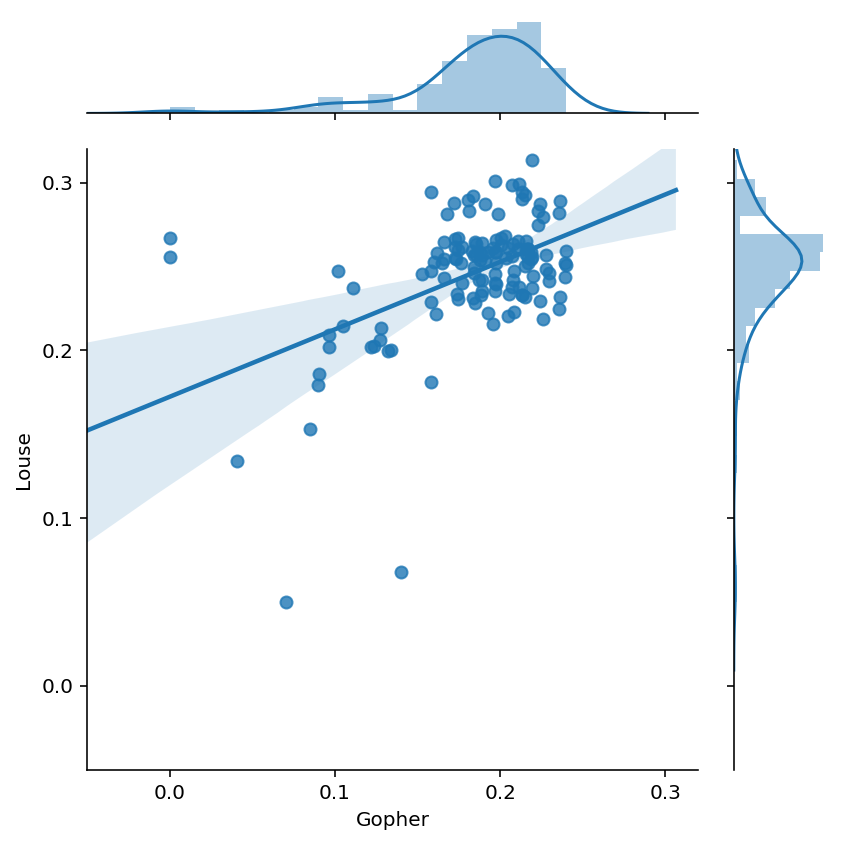

In [25]:
seaborn.jointplot( gl_ld['TreeA'], gl_ld['TreeB'], stat_func=None, kind='reg' )
xlabel( 'Gopher' )
ylabel( 'Louse' )
xticks( [ 0.0, 0.1, 0.2, 0.3 ] )
yticks( [ 0.0, 0.1, 0.2, 0.3 ] )
xlim( -0.05, 0.32 )
ylim( -0.05, 0.32 )

tight_layout()
savefig( 'figures/gopher_louse_correlation.pdf' )
savefig( 'figures/gopher_louse_correlation.svg', size=(8,8) )

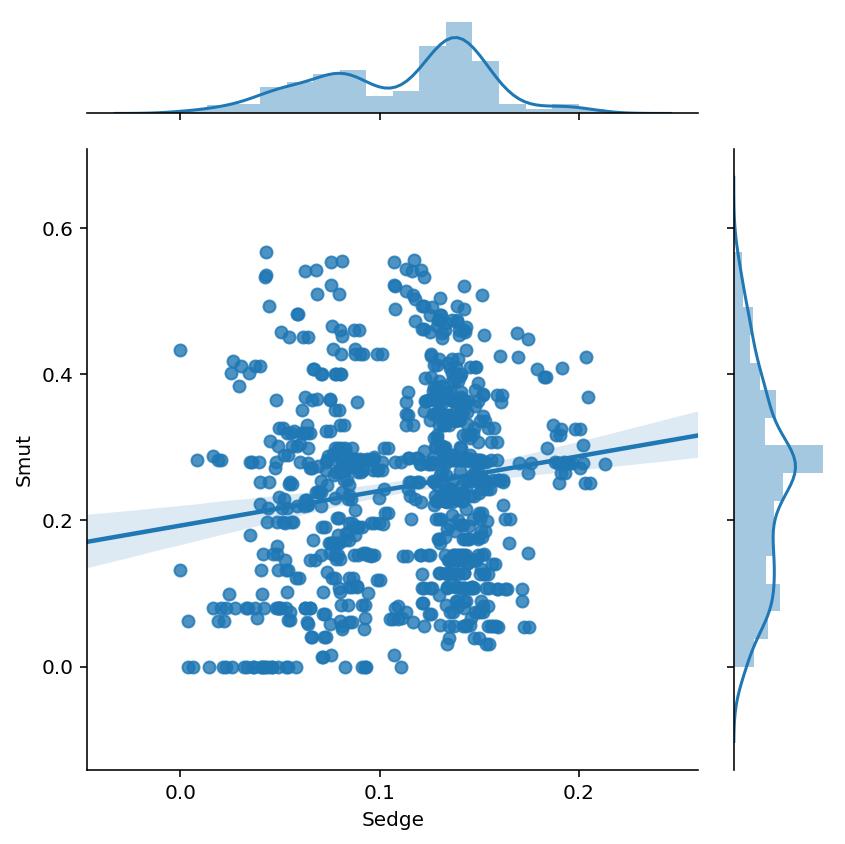

In [21]:
seaborn.jointplot( sm_ld['TreeA'], sm_ld['TreeB'], stat_func=None, kind='reg' )
xlabel( 'Sedge' )
ylabel( 'Smut' )
xticks( [ 0.0, 0.1, 0.2 ] )
yticks( [ 0.0, 0.2, 0.4, 0.6 ] )

tight_layout()
savefig( 'figures/sedge_smut_correlation.pdf' )

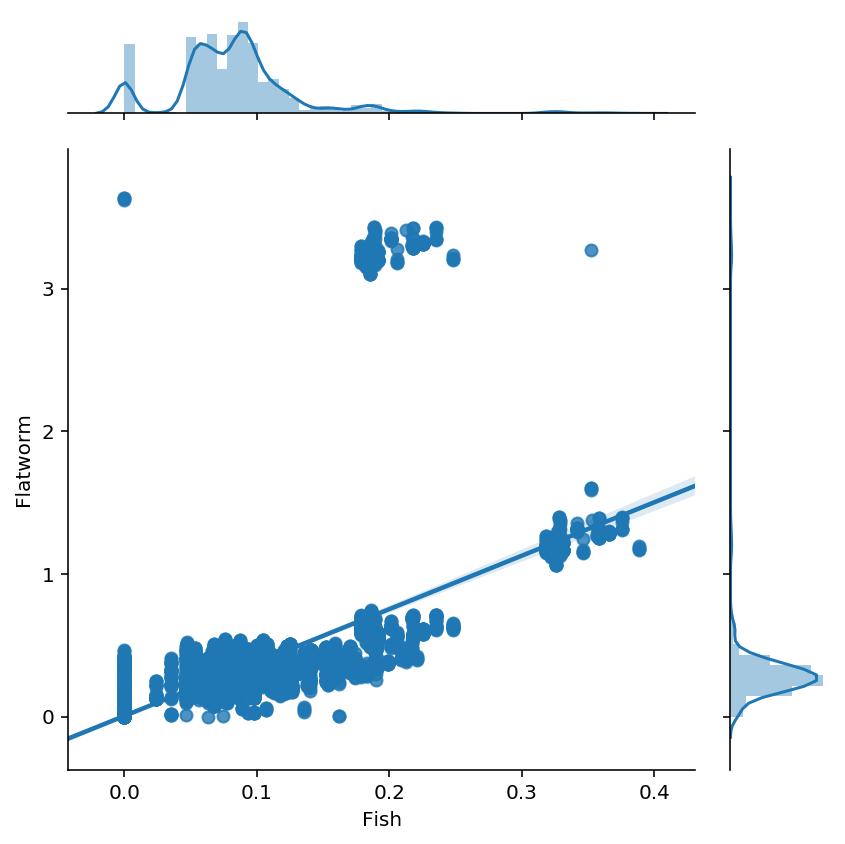

In [8]:
seaborn.jointplot( fw_ld['TreeA'], fw_ld['TreeB'], stat_func=None, kind='reg' )
xlabel( 'Fish' )
ylabel( 'Flatworm' )
xticks( [ 0.0, 0.1, 0.2, 0.3, 0.4 ] )
yticks( [ 0.0, 1.0, 2.0, 3.0 ] )

tight_layout()
savefig( 'figures/fish_worm_correlation.pdf' )

In [27]:
from dendropy import Tree

def tree_labels( treefile ) :
    t = Tree.get( file=open(treefile), schema='newick' )
    labels = []
    for node in t.inorder_node_iter() :
        if node.label :
            labels.append( node.label )
        else :
            labels.append( node.taxon.label )
    return labels

with open( 'data/tiny_tree_A.tree', 'w' ) as f :
    #f.write( '(A:1,(B:1,(C:1,D:1)E:1)F:1)G:1;' )
    f.write( '(A:2,(B:1,C:1)D:1)E:1;' )
    
with open( 'data/tiny_tree_B.tree', 'w' ) as f :
    f.write( '((a:1,b:1)e:1,(c:1,d:1)f:1)g:1;' )

T1 = SuchTree( 'data/tiny_tree_A.tree' )
t1_labels = tree_labels( 'data/tiny_tree_A.tree' )
t1_labels = [ t1_labels[i] for i in T1.adjacency()['node_ids'] ]

T2 = SuchTree( 'data/tiny_tree_B.tree' )
t2_labels = tree_labels( 'data/tiny_tree_B.tree' )
t2_labels = [ t2_labels[i] for i in T2.adjacency()['node_ids'] ]


links = pandas.DataFrame( zeros( (3,4), dtype=int ), index=T1.leafs.keys(), columns=T2.leafs.keys() )

for i,j in ( ('A','a'), ('B','c'), ('B','d'), ('C','d'), ('C','d') ) :
    links.at[i,j] = 1

links.to_csv( 'data/tiny_tree_links.csv' )

SLT = SuchLinkedTrees( T1, T2, links )

adj = pandas.DataFrame( numpy.ceil( SLT.adjacency() ), dtype=int, 
                        index=t1_labels+t2_labels,
                        columns=t1_labels+t2_labels)

In [23]:
plot_cophylo( 'data/tiny_tree_A.tree',
              'data/tiny_tree_B.tree',
              'data/tiny_tree_links.csv',
              3, 3, 'figures/tiny_tree_cophylo.pdf' )

Rotating nodes to optimize matching...
Done.


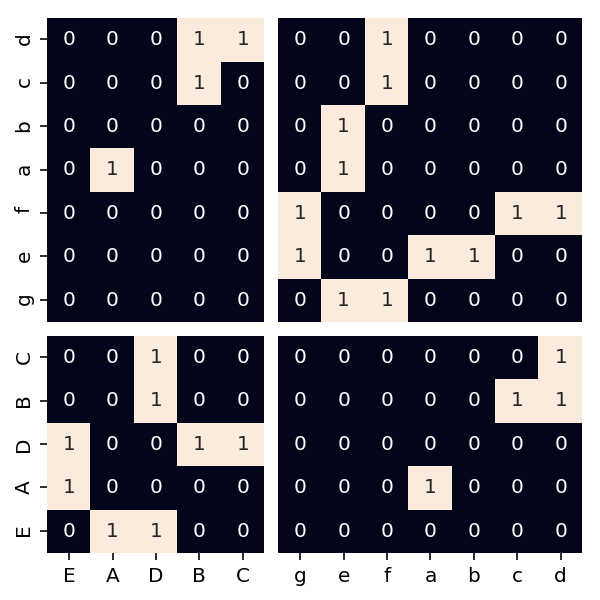

In [24]:
figure( figsize=(4,4) )

gs = matplotlib.gridspec.GridSpec( 2, 2,
                                   width_ratios=[5, 7],
                                   height_ratios=[7,5], )

subplot( gs[0,0] )
ax3 = seaborn.heatmap( adj[ t1_labels ].loc[ t2_labels ],
                       cbar=False, square=True, annot=True,
                       xticklabels=False, yticklabels=True )
ax3.invert_yaxis()

subplot( gs[0,1] )
ax2 = seaborn.heatmap( adj[ t2_labels ].loc[ t2_labels ],
                       cbar=False, square=True, annot=True,
                       xticklabels=False, yticklabels=False )
ax2.invert_yaxis()

subplot( gs[1,0] )
ax1 = seaborn.heatmap( adj[ t1_labels ].loc[ t1_labels ], 
                       cbar=False, square=True, annot=True,
                       xticklabels=True, yticklabels=True )
ax1.invert_yaxis()

subplot( gs[1,1] )
ax4 = seaborn.heatmap( adj[ t2_labels ].loc[ t1_labels ],
                       cbar=False, square=True, annot=True,
                       xticklabels=True, yticklabels=False )
ax4.invert_yaxis()

gs.tight_layout(gcf(), pad=0, w_pad=0 )

savefig( 'figures/tiny_tree_adjacency.pdf' )

Rotating nodes to optimize matching...
Done.


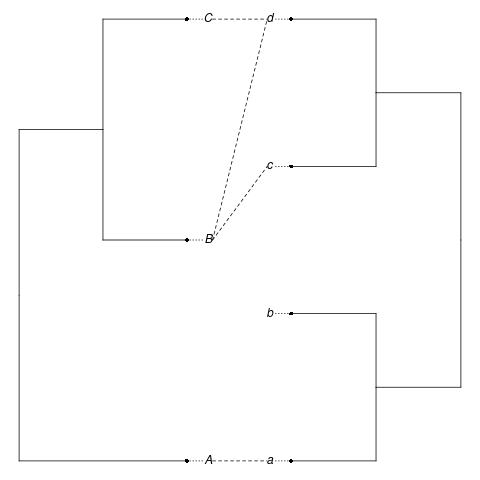

In [25]:
%%R

tr1 <- read.tree( "data/tiny_tree_A.tree" )
tr2 <- read.tree( "data/tiny_tree_B.tree" )
links <- read.csv( "data/tiny_tree_links.csv", row.names=1, stringsAsFactors = F )
im <- graph_from_incidence_matrix( as.matrix( links ) )
assoc <- as_edgelist( im )
obj <- cophylo( tr1, tr2, assoc=assoc )
#pdf( "OUTFILE", width = XX, height = YY )
plot( obj, width=2, height=2 )
#dev.off()

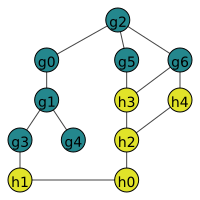

In [28]:
import igraph

g = SLT.to_igraph()
layout = g.layout_reingold_tilford()

#visual_style = { 'vertex_size' : 24, 'vertex_label' : None, 'layout' : layout }
visual_style = { 'vertex_size' : 24, 'layout' : layout }
igraph.plot( g, 'figures/tiny_tree_graph.pdf', bbox=(200,200), **visual_style )
igraph.plot( g, bbox=(200,200), **visual_style )

In [145]:
print 'mean degree      : ', mean(fw_g.degree())
print 'std(degree)      : ', std(fw_g.degree())
print 'mean betweenness : ', mean(g.betweenness(weights=g.es['weight']))
print 'std(betweenness) : ', std(g.betweenness(weights=g.es['weight']))
print 'density          : ', g.density()
print 'squareness       : ', SLT.TreeA.n_leafs / float(SLT.TreeB.n_leafs)
print 'occupancy        : ', 2*SLT.n_links / float(SLT.TreeA.n_leafs + SLT.TreeB.n_leafs)

mean degree      :  2.895734597156398
std(degree)      :  2.689902270232172
mean betweenness :  9.51388888888889
std(betweenness) :  4.999054694590385
density          :  0.212121212121
squareness       :  0.75
occupancy        :  1.14285714286


In [3]:
import json
import pyprind

studies = json.load( open( '../../SuchTree/data/studies.json' ) )

def load_study( study ) :
    T1  = SuchTree( '../../SuchTree/' + study['host'] )
    T2  = SuchTree( '../../SuchTree/' + study['guest'] )
    links = pandas.DataFrame.from_csv( '../../SuchTree/' + study['links'] )
    links = links.loc[ T1.leafs.keys() ]
    links = links[ T2.leafs.keys() ]
    return SuchLinkedTrees( T1, T2, links )

p = pyprind.ProgBar( len(studies) )

for n, study in enumerate(studies) :
    SLT = load_study( study )
    study['SLT'] = SLT
    study['igraph'] = SLT.to_igraph()
    p.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


In [13]:
meandegrees = []
densities = []
for study in studies :
    if study['type'] == 'null' : continue
    if study['type'] == 'perfect' : continue
    meandegrees.append( mean(study['igraph'].degree()) )
    densities.append( study['igraph'].density() )

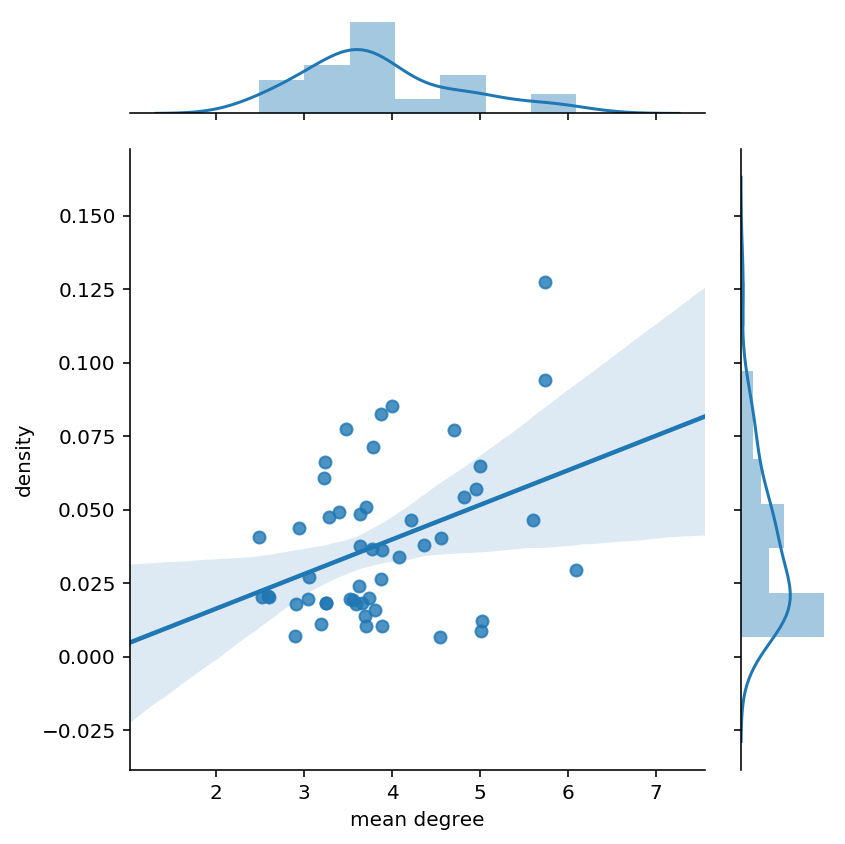

In [17]:
seaborn.jointplot( array(meandegrees), array(densities), stat_func=None, kind='reg' )
xlabel('mean degree')
ylabel('density')
tight_layout()
savefig( 'figures/density_vs_degree.pdf' )

In [16]:
study

{'SLT': <SuchTree.SuchTree.SuchLinkedTrees at 0x7fc8a8f37240>,
 u'guest': u'data/simulated/perfect/perfect49/guest.tree',
 u'host': u'data/simulated/perfect/perfect49/host.tree',
 'igraph': <igraph.Graph at 0x7fc8a8f37338>,
 u'links': u'data/simulated/perfect/perfect49/links.csv',
 u'name': u'perfect49',
 u'type': u'perfect'}